<a href="https://colab.research.google.com/github/sagarpatiler/machine_learning/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/datasets/gld_price_data.csv')

In [ ]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.shape

(2290, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlations

In [ ]:
correlation = data.corr()

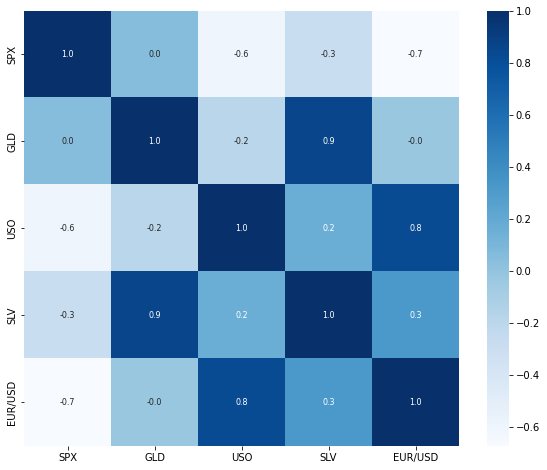

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (10,8))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

In [ ]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

Distribution

In [ ]:
sns.set_style('darkgrid')

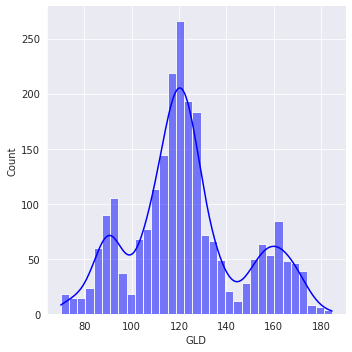

In [ ]:
sns.displot(data['GLD'],color='blue',kde=True)

Splitting the Features and Target

In [ ]:
X=data.drop(columns=['Date','GLD'])
Y=data['GLD']

In [ ]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [ ]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

Splitting into Training data and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(2290,) (1832,) (458,)


Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[113.17850042 148.58390036 140.71609829 112.53530169 113.60719972
  95.6501994  111.9063998   93.30429914 120.95230093 127.13549936
 147.88049951 120.52549884 119.25590042  88.1536007   96.17740027
  92.83069875 116.7732006   88.94589893 125.19870131 114.78369977
 118.57720002 152.62790217 122.52729806 119.9666     171.05789957
 108.2090985  120.59720052  87.13159823  88.18940081  88.70059933
 121.38330018 154.3211016  149.54469805 126.00730025 126.5847996
  90.98049868 156.81619938 121.59810156 106.58670051 143.9537969
  92.59709975 127.59920089 117.52860073 152.75490131 119.33499979
  91.37280158  80.29189984 120.13790171 131.88550006 119.04729931
 127.24780082 165.70420055 153.11970053  92.6471991  149.1749001
 152.38609878 113.15220057 112.67700041  87.19569936 127.80519885
 125.33440101 151.75210269 114.37899986 110.78619983 161.59949782
 117.3789986  108.53750098 132.12629979 132.58830046 125.42849998
 117.15800023 149.63210201 156.09410002 168.99389505 110.0058002
 140.75969838 

In [ ]:
test_data_prediction.shape

(458,)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9872775170838556


Compare the Actual Values and Predicted Values in a Plot

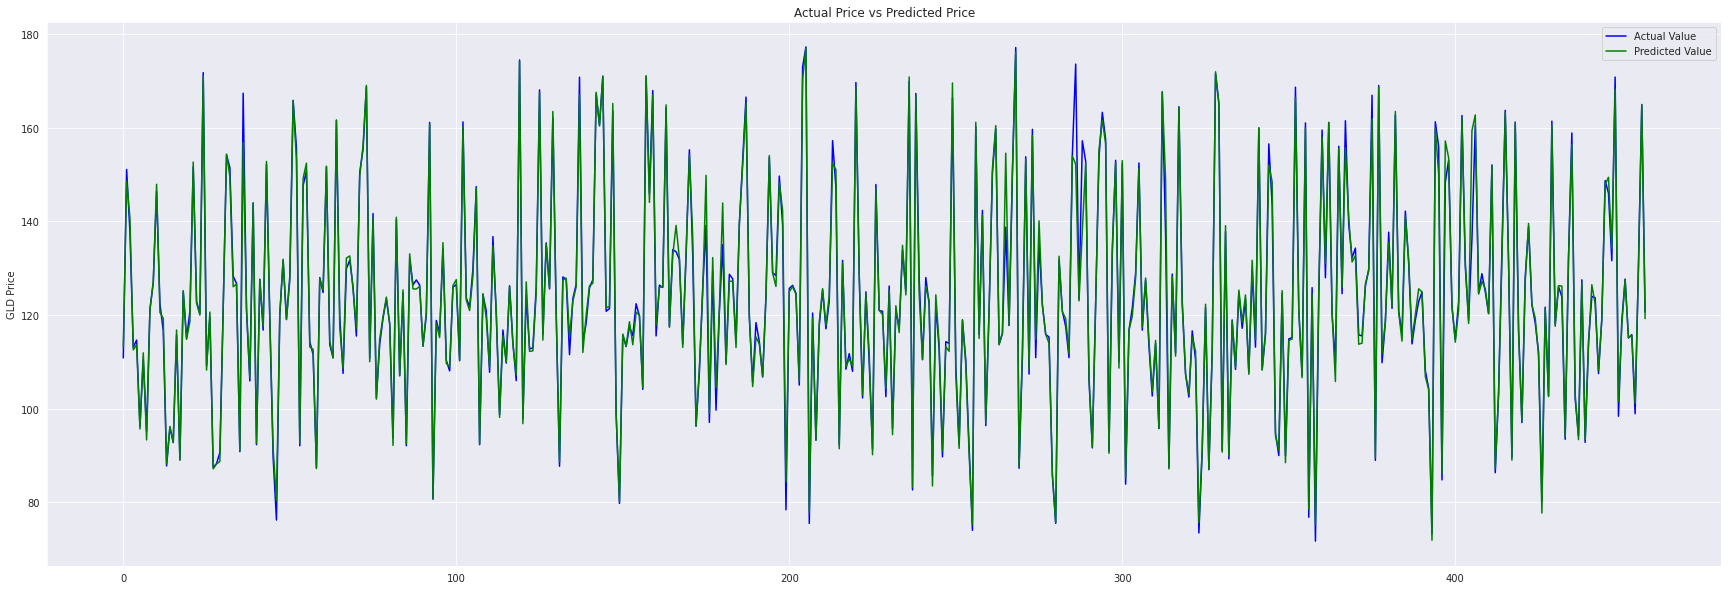

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(list(Y_test), color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.ylabel('GLD Price')
plt.legend()
plt.show()